<a href="https://colab.research.google.com/github/tibaes/mnist/blob/master/AIDojo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação

In [1]:
!pip install --upgrade pip
!pip install tensorflow==2.0.0

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.0.0'

# Ferramentas

In [0]:
def show_sample(X, y, index=0, pred=-1):
    title = 'LABEL: ' + str(y[index])
    if pred > -1:
        title += ' PRED: ' + str(pred)
    plt.imshow(X[index], cmap='gray')
    plt.title(title)
    plt.show()

In [0]:
def train(model, X_train, y_train, X_test, y_test, epochs=1):
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    print(model.summary())
    model.fit(X_train, y_train, epochs=epochs)
    print(model.evaluate(X_test, y_test, verbose=2))
    return model

In [0]:
def predict(model, X, y, shape=(1, 28, 28), index=0):
    pred = model.predict(X[index].reshape(shape)).argmax()
    show_sample(X=X, y=y, index=index, pred=pred)
    return pred

# Explorando MNIST

In [0]:
mnist = tf.keras.datasets.mnist

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


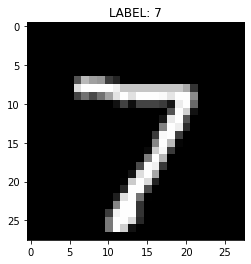

In [9]:
show_sample(X=X_test, y=y_test, index=0)

In [0]:
# X_train[0]

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train[0].shape

(28, 28)

In [13]:
X_test[0].reshape(1, 28, 28).shape

(1, 28, 28)

### Perceptron

In [0]:
perceptron = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
perceptron = train(perceptron, X_train, y_train, X_test, y_test, epochs=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2611 - accuracy: 0.9256
10000/1 - 0s - loss: 0.0990 - accuracy: 0.9589
[0.1340961000546813, 0.9589]


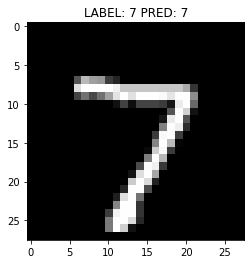

7

In [16]:
predict(perceptron, X_test, y_test, index=0)

### MultiLayer Perceptron

In [0]:
mlp = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [18]:
mpl = train(mlp, X_train, y_train, X_test, y_test, epochs=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2539

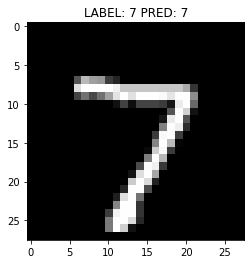

7

In [19]:
predict(mlp, X_test, y_test, index=0)

### CNN

In [0]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
X_train_cnn = X_train.reshape(len(X_train), 28, 28, 1)
X_test_cnn = X_test.reshape(len(X_test), 28, 28, 1)

In [22]:
cnn = train(cnn, X_train_cnn, y_train, X_test_cnn, y_test, epochs=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples
60000/60000 [==============================] - 25s 422us/sample - loss: 1.6407 - accur

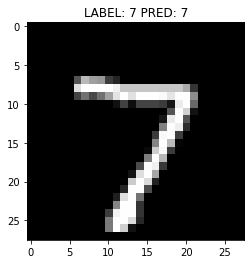

7

In [23]:
predict(cnn, X_test, y_test, shape=(1, 28, 28, 1), index=0)